In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [48]:
# input
random.seed(98103)
n=30
x=np.random.random(n)
x.shape
#x

(30,)

In [49]:
# output
y= [np.sin(x[i]) for i in range(n)]
y=np.array(y)
y.shape
#y

(30,)

In [50]:
# random gaussian noise y=y+e
e=np.random.randn(n)
e.shape

(30,)

In [51]:
y=y+e

In [52]:
# make dataframe
data=pd.DataFrame( {'x1':x,'y':y} )
data.head()

,x1,y
0,0.916274,0.065122
1,0.350705,-0.416282
2,0.200863,1.073382
3,0.086913,-0.832092
4,0.015663,1.196086


In [53]:
# plot data
def plot_data(data):
    plt.plot(data['x1'],data['y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

In [54]:
# create polynomial features
def poly_feat(data,deg):
    df=data[['x1']]
    for i in range(1,deg):
        df['x'+str(i+1)]=df['x'+str(i)]*df['x1']
    return df

In [55]:
# plot predictions
def plot_pred(data,model):
    w=model.coef_
    w=w.reshape(-1,)
    deg=len(w)
    x_pred=pd.DataFrame( {'x1':[ i/200.0 for i in range(200)] } )
    x_pred=poly_feat(x_pred,deg)
    y_pred=model.predict(x_pred)
    
    plot_data(data)
    plt.plot(x_pred['x1'],y_pred,'g-',label='degree '+str(deg))
    plt.legend(loc='upper left')
    plt.show()

In [56]:
# print coeff in pretty way
def print_coef(model):
    w=model.intercept_
    w=w.reshape(-1,)
    w=np.append(w,model.coef_)
    reversed(w)
    print(np.poly1d(w))

In [57]:
def lasso_reg(data,deg,l1_pen):
    df=poly_feat(data,deg)
    model=Lasso(alpha=l1_pen,max_iter=3000,tol=1e-10)
    model=model.fit(df,data[['y']])
    return model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


       8         7         6          5         4         3         2
0.362 x - 6.804 x + 22.96 x + 0.5765 x - 17.63 x - 18.38 x - 7.073 x - 0 x + 30.81


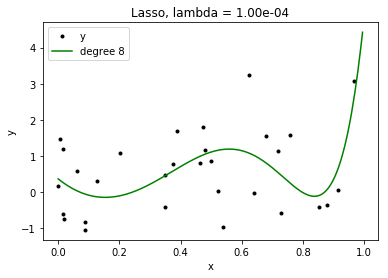

        8          7     5     4
0.2342 x + 0.7616 x - 0 x - 0 x + 0.1021


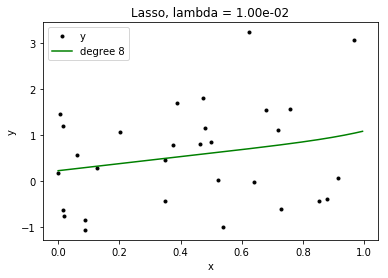

        8
0.5676 x


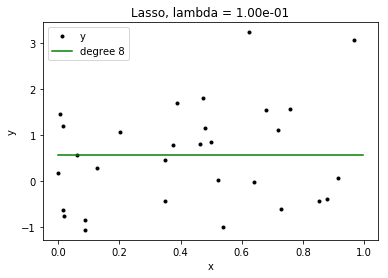

        8
0.5676 x


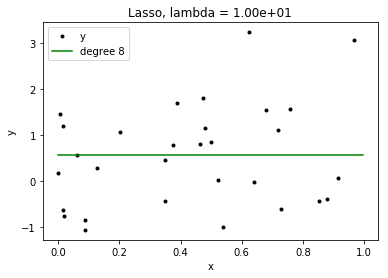

In [58]:
for l1 in [0.0001,0.01,0.1,10]:
    model=lasso_reg(data,8,l1)
    print_coef(model)
    plt.title('Lasso, lambda = %.2e'%l1)
    plot_pred(data,model)